## Check Request Response For API link

In [21]:
import re
import requests
import json
import pprint
import matplotlib.pyplot as plt
import pandas as pd 

url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/monetary-operation/monetary-base-endperiod"

res = requests.get(url) #200 means success

print(res)

<Response [200]>


## Apply Json method to parse valid Json string and convert to a Python dictionary

In [22]:
import json
answer = json.loads(res.text)
answer

{'header': {'success': True, 'err_code': '0000', 'err_msg': 'No error found'},
 'result': {'datasize': 100,
  'records': [{'end_of_month': '2022-09',
    'cert_of_indebt': 605125,
    'gov_notes_coins_circulation': 13127,
    'aggr_balance_bf_disc_win': 123336,
    'outstanding_efbn': 1189978,
    'ow_lb_bf_disc_win': 1138367,
    'mb_bf_disc_win_total': 1931566},
   {'end_of_month': '2022-08',
    'cert_of_indebt': 603545,
    'gov_notes_coins_circulation': 13126,
    'aggr_balance_bf_disc_win': 125024,
    'outstanding_efbn': 1188629,
    'ow_lb_bf_disc_win': 1142354,
    'mb_bf_disc_win_total': 1930324},
   {'end_of_month': '2022-07',
    'cert_of_indebt': 610765,
    'gov_notes_coins_circulation': 13153,
    'aggr_balance_bf_disc_win': 165158,
    'outstanding_efbn': 1188492,
    'ow_lb_bf_disc_win': 1139314,
    'mb_bf_disc_win_total': 1977568},
   {'end_of_month': '2022-06',
    'cert_of_indebt': 613605,
    'gov_notes_coins_circulation': 13188,
    'aggr_balance_bf_disc_win': 23

## Filtered to useful dataset

In [23]:
list_dict = answer['result']['records']
list_dict

[{'end_of_month': '2022-09',
  'cert_of_indebt': 605125,
  'gov_notes_coins_circulation': 13127,
  'aggr_balance_bf_disc_win': 123336,
  'outstanding_efbn': 1189978,
  'ow_lb_bf_disc_win': 1138367,
  'mb_bf_disc_win_total': 1931566},
 {'end_of_month': '2022-08',
  'cert_of_indebt': 603545,
  'gov_notes_coins_circulation': 13126,
  'aggr_balance_bf_disc_win': 125024,
  'outstanding_efbn': 1188629,
  'ow_lb_bf_disc_win': 1142354,
  'mb_bf_disc_win_total': 1930324},
 {'end_of_month': '2022-07',
  'cert_of_indebt': 610765,
  'gov_notes_coins_circulation': 13153,
  'aggr_balance_bf_disc_win': 165158,
  'outstanding_efbn': 1188492,
  'ow_lb_bf_disc_win': 1139314,
  'mb_bf_disc_win_total': 1977568},
 {'end_of_month': '2022-06',
  'cert_of_indebt': 613605,
  'gov_notes_coins_circulation': 13188,
  'aggr_balance_bf_disc_win': 233493,
  'outstanding_efbn': 1188176,
  'ow_lb_bf_disc_win': 1142598,
  'mb_bf_disc_win_total': 2048462},
 {'end_of_month': '2022-05',
  'cert_of_indebt': 606035,
  'gov_

## Build up Python Dictionary by list comprehension to prepare for creating DataFrame

In [24]:
d = {'end_of_month': [item['end_of_month'] for item in list_dict],
  'cert_of_indebt': [item['cert_of_indebt'] for item in list_dict],
  'gov_notes_coins_circulation': [item['gov_notes_coins_circulation'] for item in list_dict],
  'aggr_balance_bf_disc_win': [item['aggr_balance_bf_disc_win'] for item in list_dict],
  'outstanding_efbn': [item['outstanding_efbn'] for item in list_dict],
  'ow_lb_bf_disc_win': [item['ow_lb_bf_disc_win'] for item in list_dict],
  'mb_bf_disc_win_total': [item['mb_bf_disc_win_total'] for item in list_dict]
}

## Create Dataframe by Pandas library

In [25]:
import pandas as pd 

df = pd.DataFrame(d)
df

,end_of_month,cert_of_indebt,gov_notes_coins_circulation,aggr_balance_bf_disc_win,outstanding_efbn,ow_lb_bf_disc_win,mb_bf_disc_win_total
0,2022-09,605125,13127,123336,1189978,1138367,1931566
1,2022-08,603545,13126,125024,1188629,1142354,1930324
2,2022-07,610765,13153,165158,1188492,1139314,1977568
3,2022-06,613605,13188,233493,1188176,1142598,2048462
4,2022-05,606035,13236,319972,1189154,1138098,2128397
...,...,...,...,...,...,...,...
95,2014-10,336815,11255,239185,753519,674286,1340774
96,2014-09,344165,11248,239229,752936,671618,1347578
97,2014-08,332475,11210,239198,753292,671474,1336175
98,2014-07,329685,11188,221637,752915,672644,1315425


## Inspect and Clean Data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   end_of_month                 100 non-null    object
 1   cert_of_indebt               100 non-null    int64 
 2   gov_notes_coins_circulation  100 non-null    int64 
 3   aggr_balance_bf_disc_win     100 non-null    int64 
 4   outstanding_efbn             100 non-null    int64 
 5   ow_lb_bf_disc_win            100 non-null    int64 
 6   mb_bf_disc_win_total         100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [27]:
df['end_of_month']=pd.to_datetime(df['end_of_month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   end_of_month                 100 non-null    datetime64[ns]
 1   cert_of_indebt               100 non-null    int64         
 2   gov_notes_coins_circulation  100 non-null    int64         
 3   aggr_balance_bf_disc_win     100 non-null    int64         
 4   outstanding_efbn             100 non-null    int64         
 5   ow_lb_bf_disc_win            100 non-null    int64         
 6   mb_bf_disc_win_total         100 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.6 KB


In [28]:
df.sort_values(by='end_of_month', ascending=True, inplace=True)
df

,end_of_month,cert_of_indebt,gov_notes_coins_circulation,aggr_balance_bf_disc_win,outstanding_efbn,ow_lb_bf_disc_win,mb_bf_disc_win_total
99,2014-06-01,335195,11174,163909,752769,660885,1263047
98,2014-07-01,329685,11188,221637,752915,672644,1315425
97,2014-08-01,332475,11210,239198,753292,671474,1336175
96,2014-09-01,344165,11248,239229,752936,671618,1347578
95,2014-10-01,336815,11255,239185,753519,674286,1340774
...,...,...,...,...,...,...,...
4,2022-05-01,606035,13236,319972,1189154,1138098,2128397
3,2022-06-01,613605,13188,233493,1188176,1142598,2048462
2,2022-07-01,610765,13153,165158,1188492,1139314,1977568
1,2022-08-01,603545,13126,125024,1188629,1142354,1930324


In [29]:
df.to_csv('Monetary Base – End of period figures.csv')

## Investigate insights

In [30]:
agg_balance = df['aggr_balance_bf_disc_win'].iloc[:]
month = df['end_of_month']

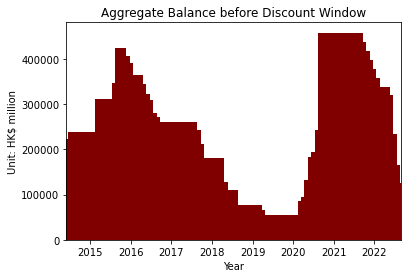

In [31]:
plt.bar(month, agg_balance, color ='maroon',width = len(df))
plt.title('Aggregate Balance before Discount Window')
plt.xlabel('Year')
plt.xlim(month[len(df)-1], month[0])
plt.ylabel('Unit: HK$ million')
plt.savefig('Aggregate Balance before Discount Window barplot.png')
plt.show()

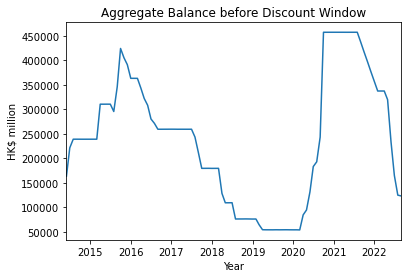

In [32]:
plt.plot(month, agg_balance)
plt.title('Aggregate Balance before Discount Window')
plt.xlabel('Year')
plt.xlim(month[len(df)-1], month[0])
plt.ylabel('HK$ million')
plt.savefig('Aggregate Balance before Discount Window lineplot.png')
plt.show()